# Analysis - Cyclist 2019 Q1 - Q4

<hr>

## Libraries & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258796 entries, 0 to 3258795
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   start_time     object
 1   end_time       object
 2   day            object
 3   trip_duration  int64 
 4   start_id       int64 
 5   end_id         int64 
 6   start_name     object
 7   end_name       object
 8   bike_id        int64 
 9   gender         object
 10  age            int64 
 11  user_type      object
dtypes: int64(5), object(7)
memory usage: 298.4+ MB


In [4]:
data.head(3)

,start_time,end_time,day,trip_duration,start_id,end_id,start_name,end_name,bike_id,gender,age,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,Tuesday,390,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Male,31,Member
1,2019-01-01 00:08:13,2019-01-01 00:15:34,Tuesday,441,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Female,30,Member
2,2019-01-01 00:13:23,2019-01-01 00:27:12,Tuesday,829,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Female,26,Member


In [5]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

## Analysis for Members

### Data

In [6]:
member_data = data[data['user_type'] == 'Member']

In [7]:
member_number_of_trips = member_data.shape[0]

member_female_trips = member_data[member_data['gender'] == 'Female'].shape[0]
member_male_trips = member_data[member_data['gender'] == 'Male'].shape[0]

member_mean_tripduration = member_data['trip_duration'].mean()
member_min_tripduration = member_data['trip_duration'].min()
member_max_tripduration = member_data['trip_duration'].max()

member_mode_month = calendar.month_name[member_data['start_time'].dt.month.mode()[0]]
member_min_month = calendar.month_name[member_data['start_time'].dt.month.value_counts().idxmin()]

member_mode_day = member_data['day'].mode()[0]
member_min_day = member_data['day'].value_counts().idxmin()

### Data Visualisations

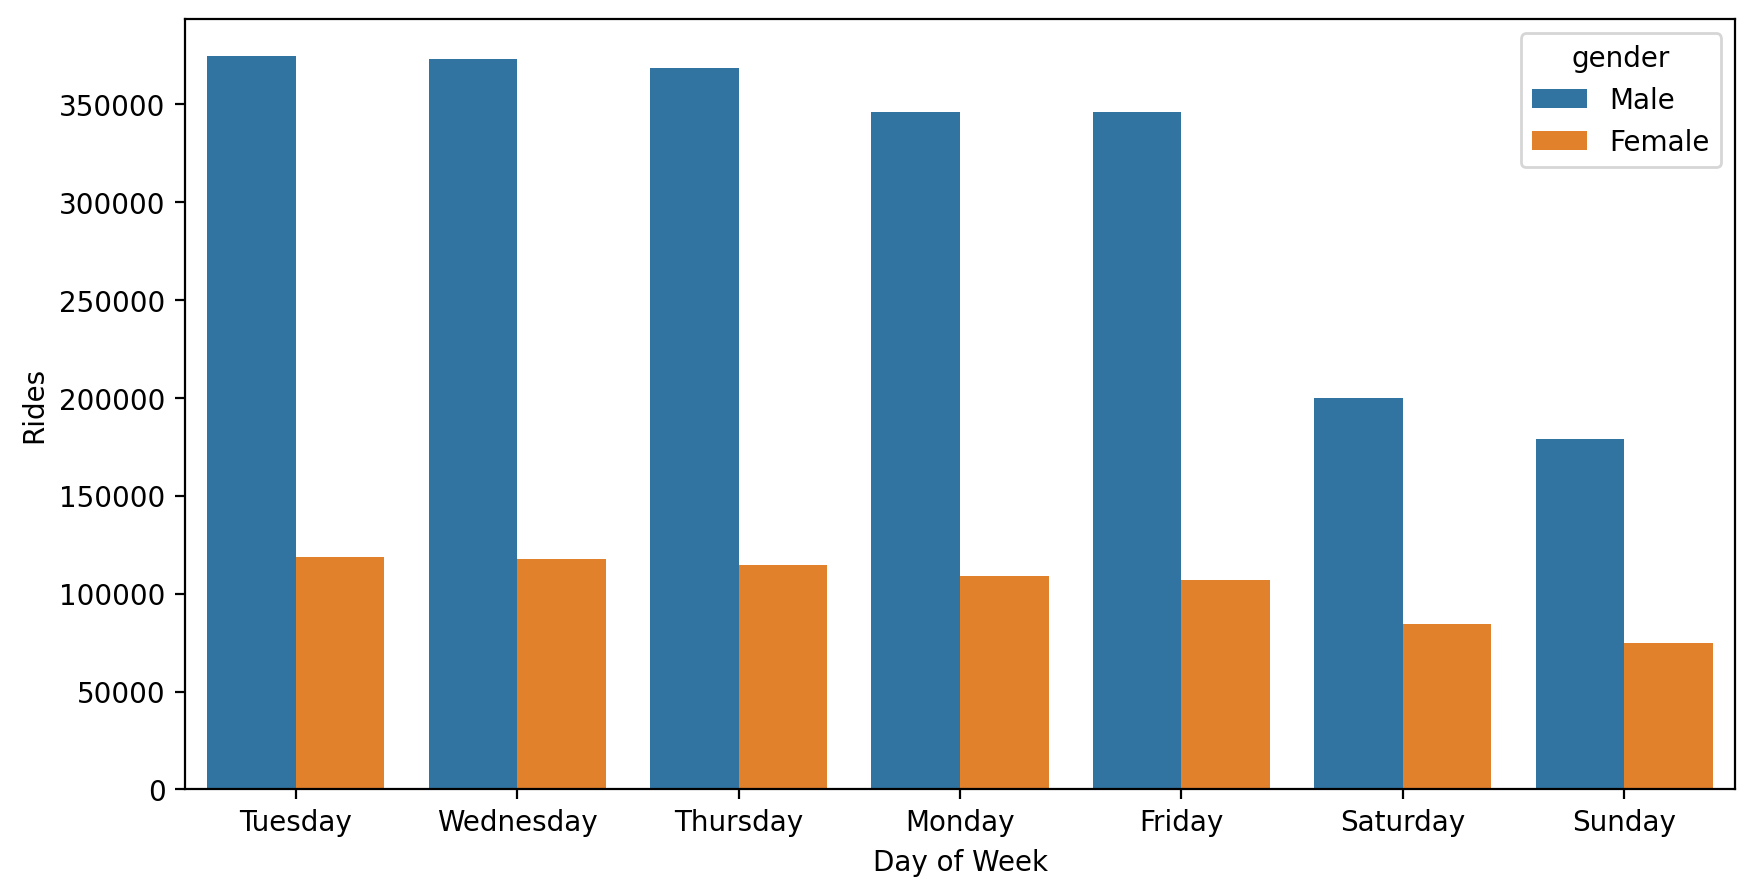

In [21]:
plt.figure(figsize=(10,5), dpi=200)
day_wise_trips_plot = sns.countplot(data=member_data, x='day', hue='gender', order=member_data['day'].value_counts().index)

plt.xlabel('Day of Week')
plt.ylabel('Rides')
plt.savefig('../Reports/plots/m_day_of_week.png')

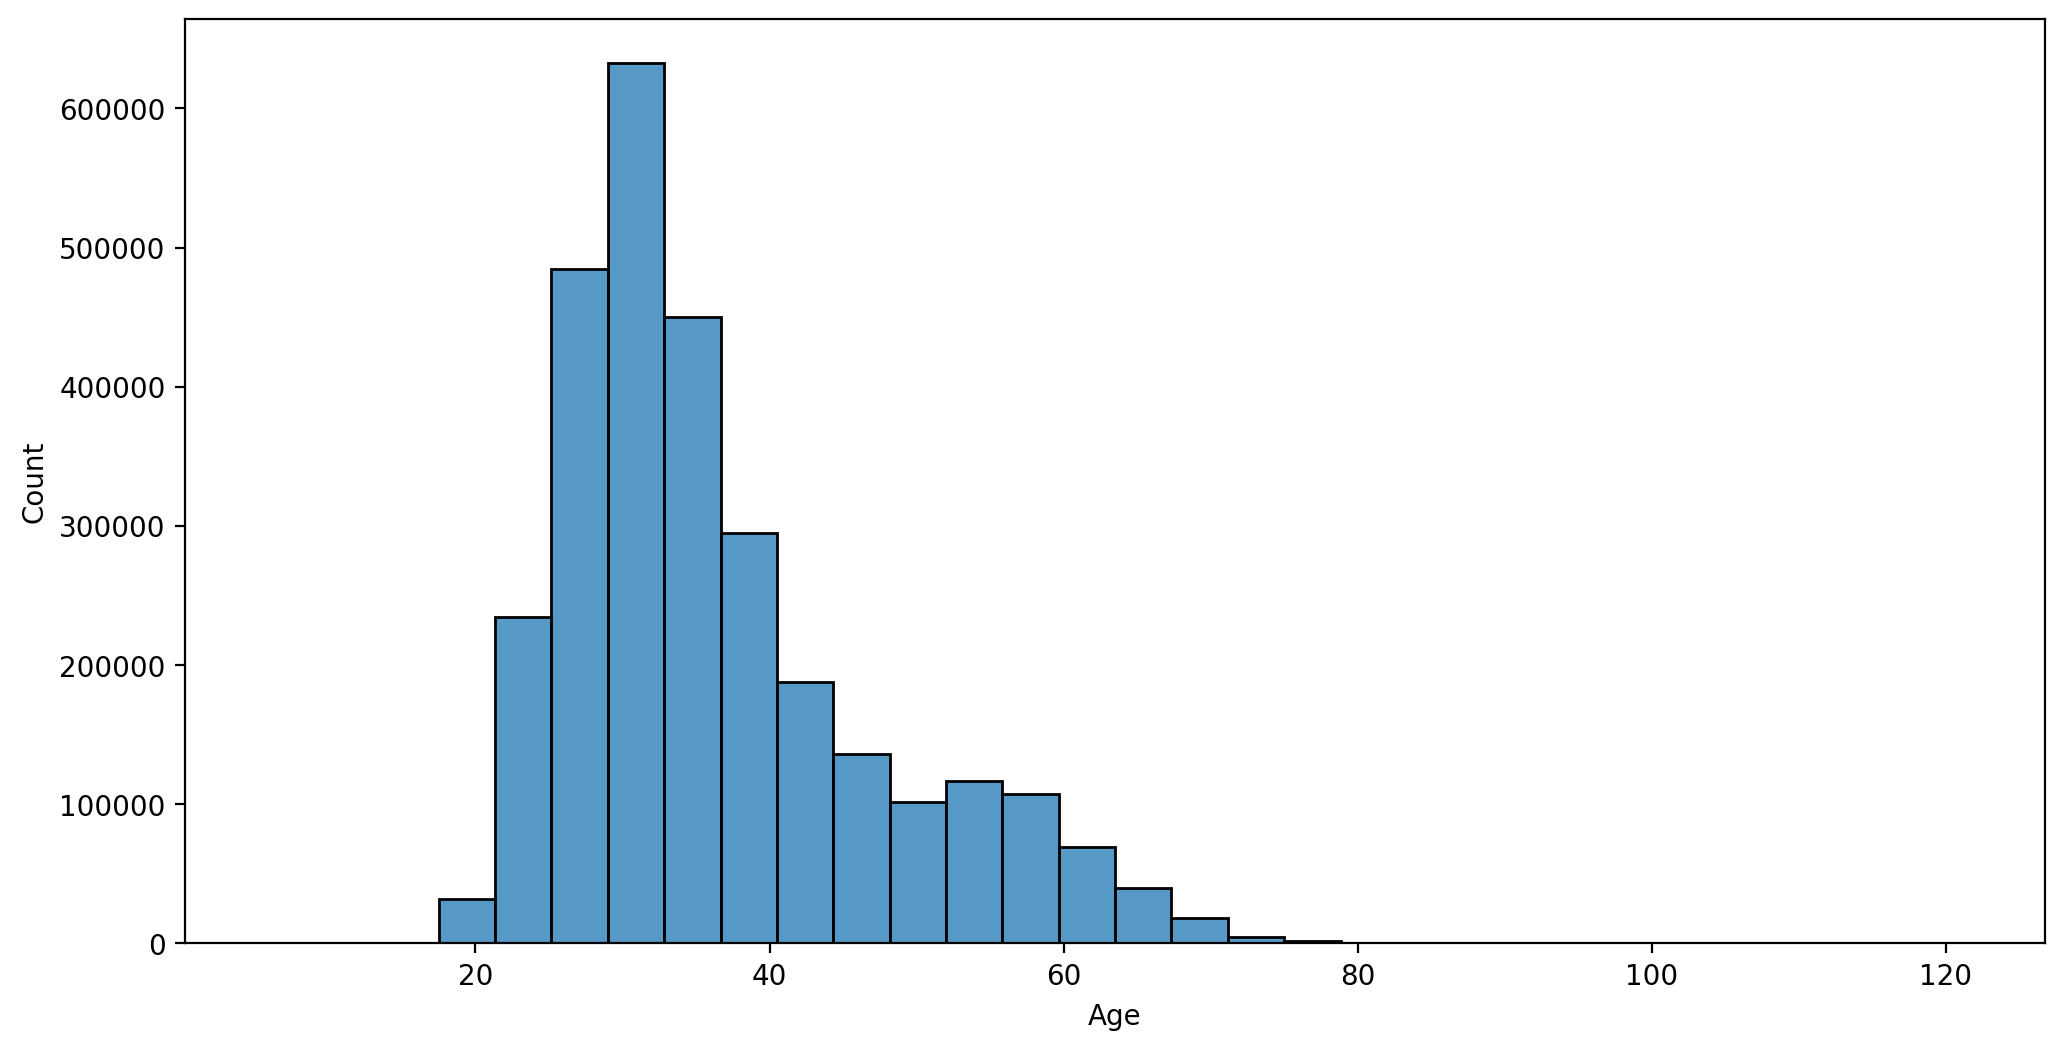

In [9]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(member_data['age'], bins=30)

plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('../Reports/plots/m_age_dist.png')

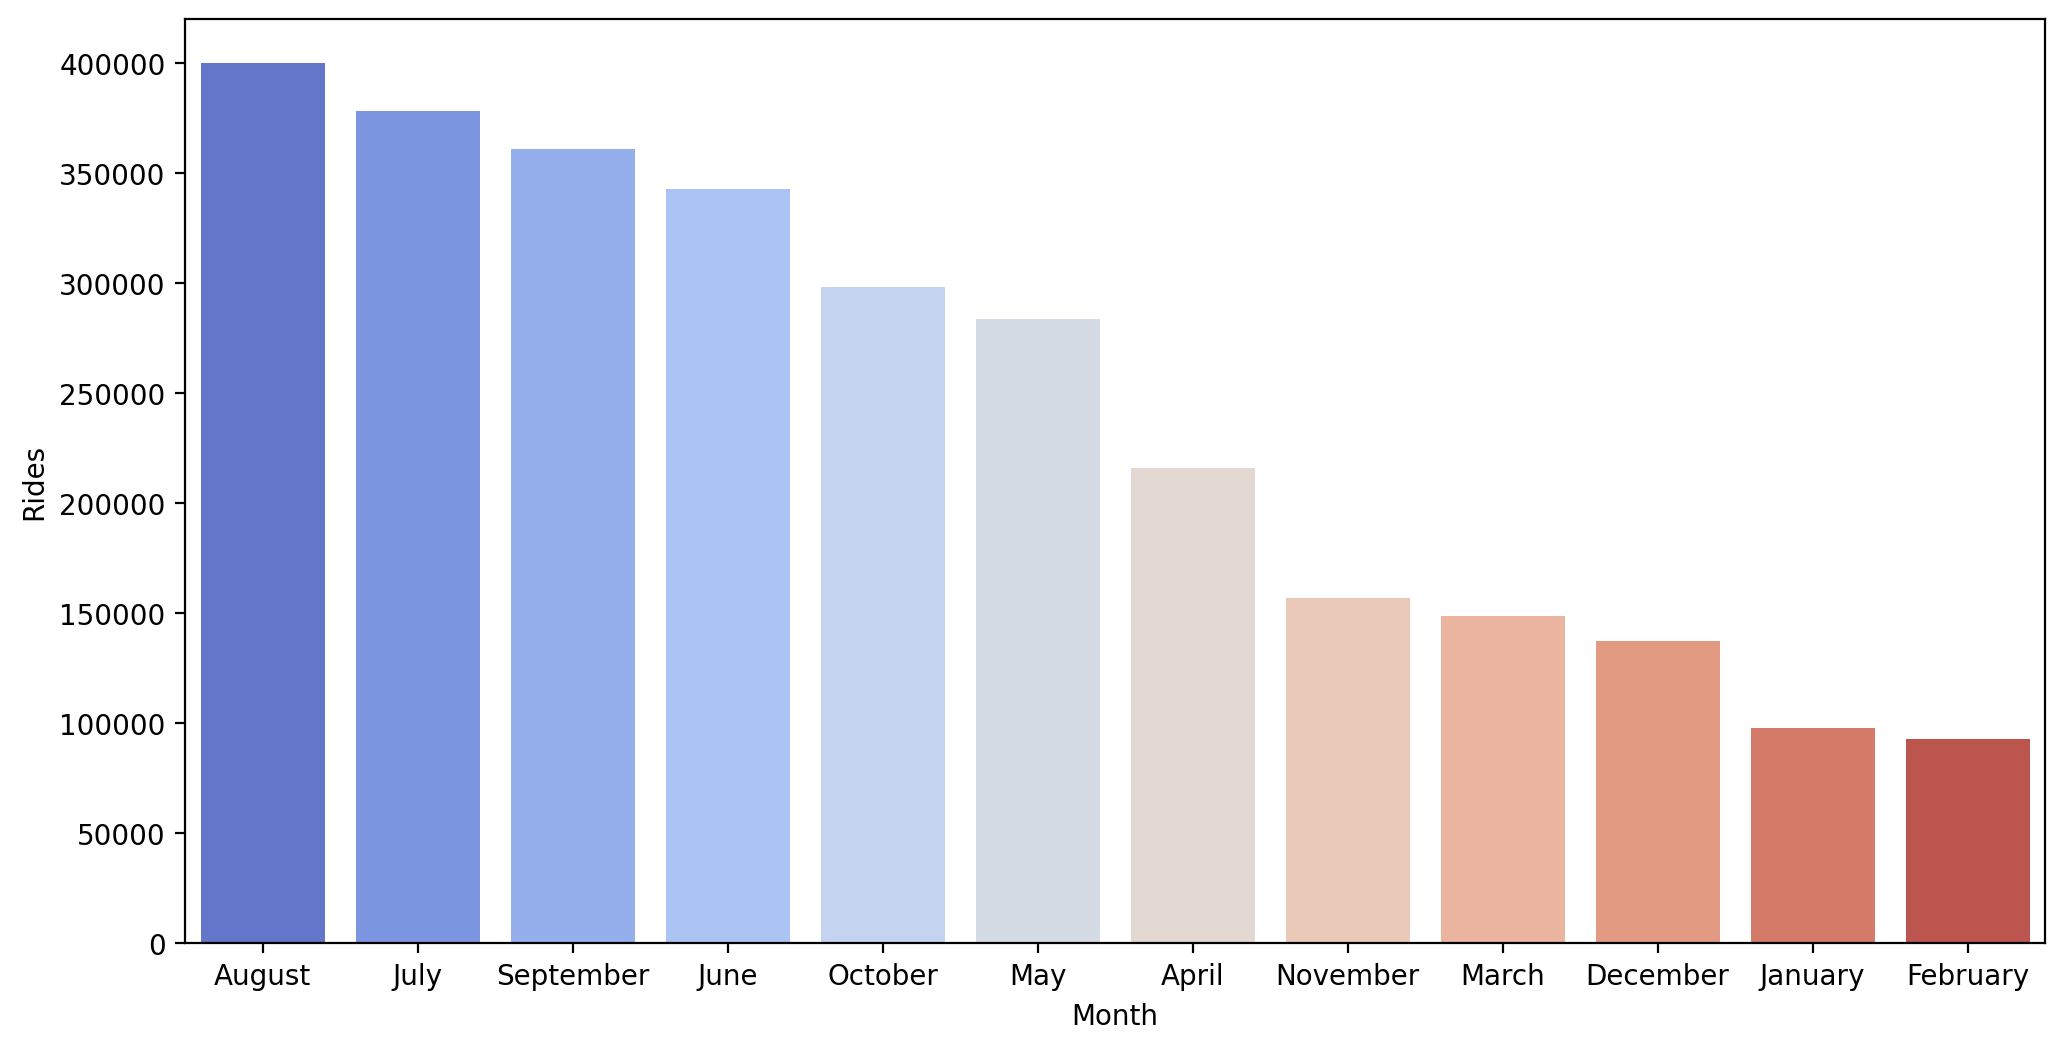

In [24]:
labels = []
order = list(member_data['start_time'].dt.month.value_counts().index)
values = list(member_data['start_time'].dt.month.value_counts().values)
for index in order:
    labels.append(calendar.month_name[index])


plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x=labels, y=values, palette='coolwarm')

plt.xlabel('Month')
plt.ylabel('Rides')
plt.savefig('../Reports/plots/m_monthly_rides.png')

In [11]:
print(f"The mean trip duaration for members is: {round(member_data['trip_duration'].mean()/60, 2)} minutes")

The mean trip duaration for members is: 14.31 minutes


## Analysis for Casual Customers

### Data

In [12]:
casual_data = data[data['user_type'] == 'Casual']

In [13]:
casual_number_of_trips = casual_data.shape[0]

casual_female_trips = casual_data[casual_data['gender'] == 'Female'].shape[0]
casual_male_trips = casual_data[casual_data['gender'] == 'Male'].shape[0]

casual_mean_tripduration = casual_data['trip_duration'].mean()
casual_min_tripduration = casual_data['trip_duration'].min()
casual_max_tripduration = casual_data['trip_duration'].max()

casual_mode_month = calendar.month_name[casual_data['start_time'].dt.month.mode()[0]]
casual_min_month = calendar.month_name[casual_data['start_time'].dt.month.value_counts().idxmin()]

casual_mode_day = casual_data['day'].mode()[0]
casual_min_day = casual_data['day'].value_counts().idxmin()

### Data Visualisations

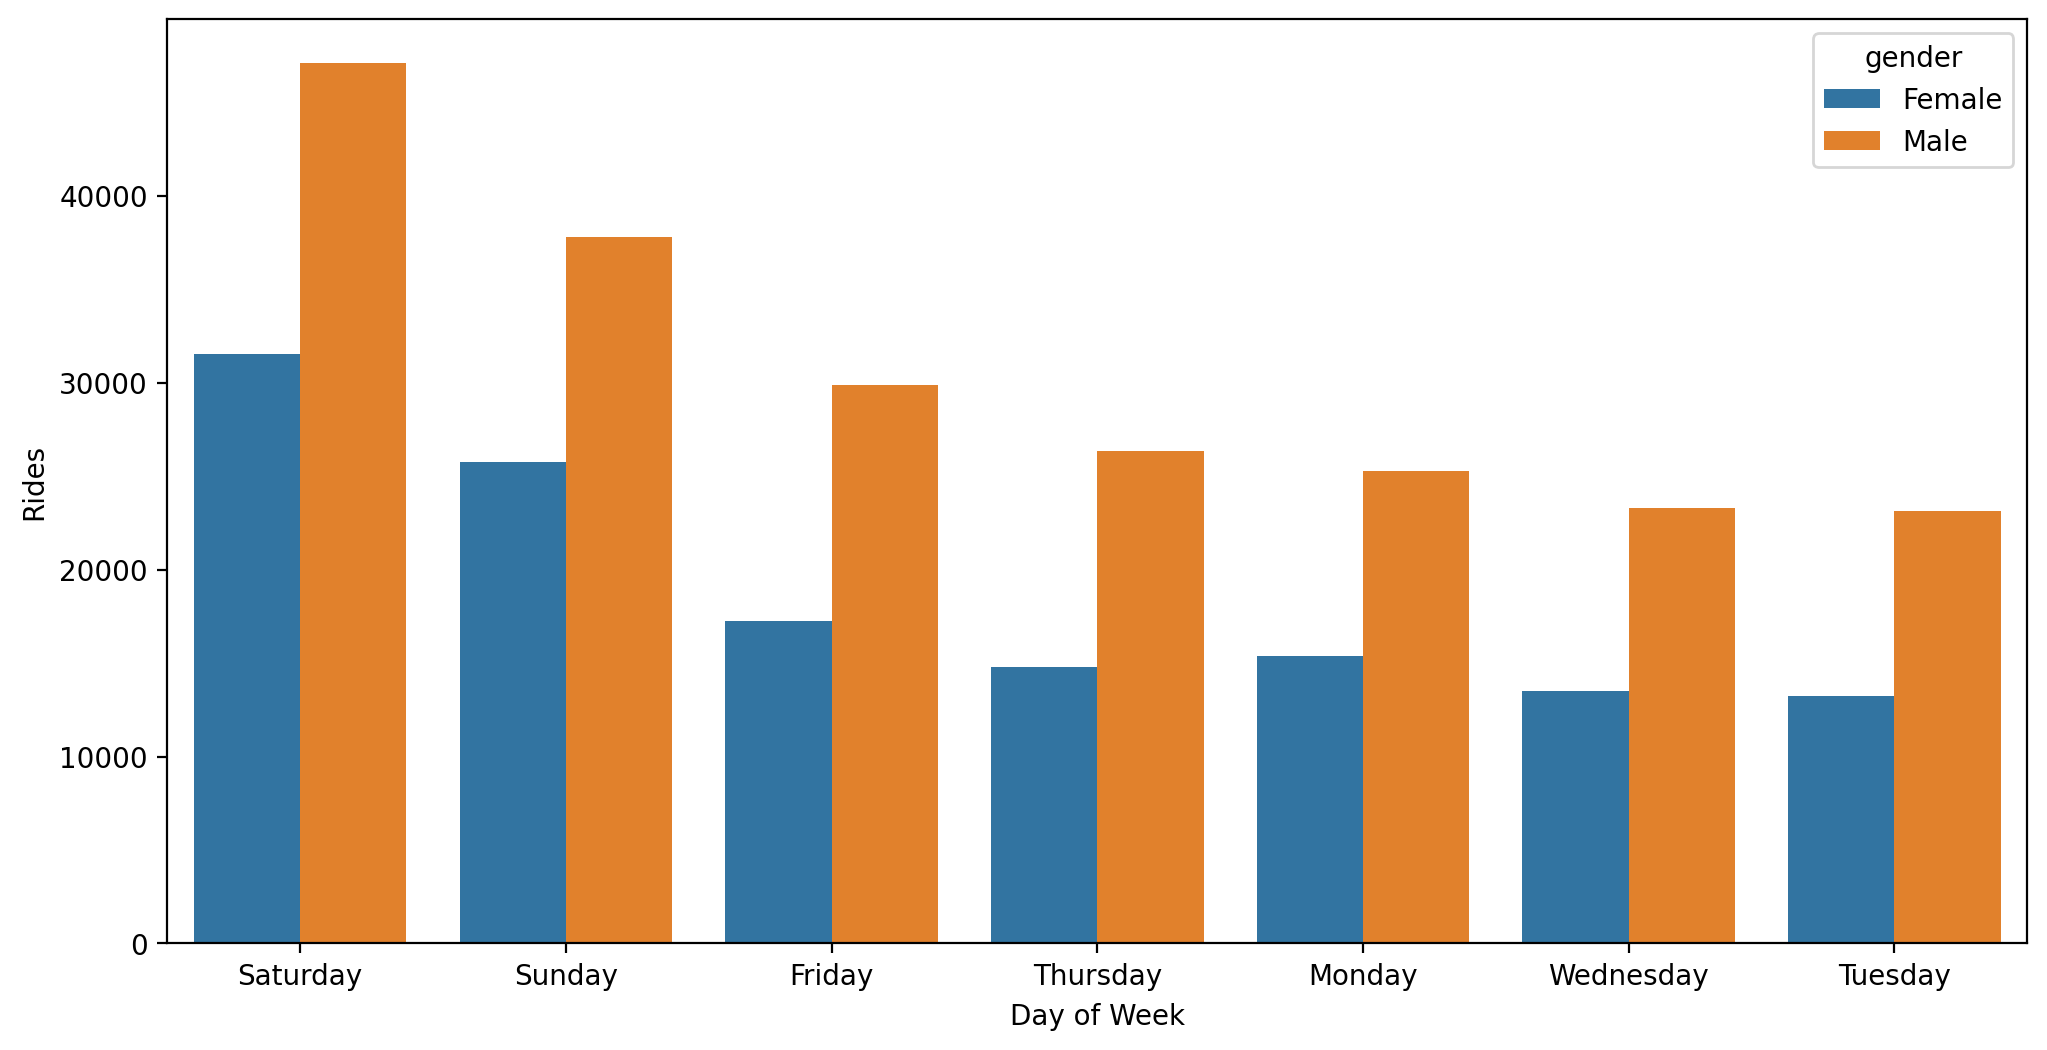

In [14]:
plt.figure(figsize=(12,6), dpi=200)
day_wise_trips_plot = sns.countplot(data=casual_data, x='day', hue='gender', order=casual_data['day'].value_counts().index)

plt.xlabel('Day of Week')
plt.ylabel('Rides')
plt.savefig('../Reports/plots/c_day_of_week.png')

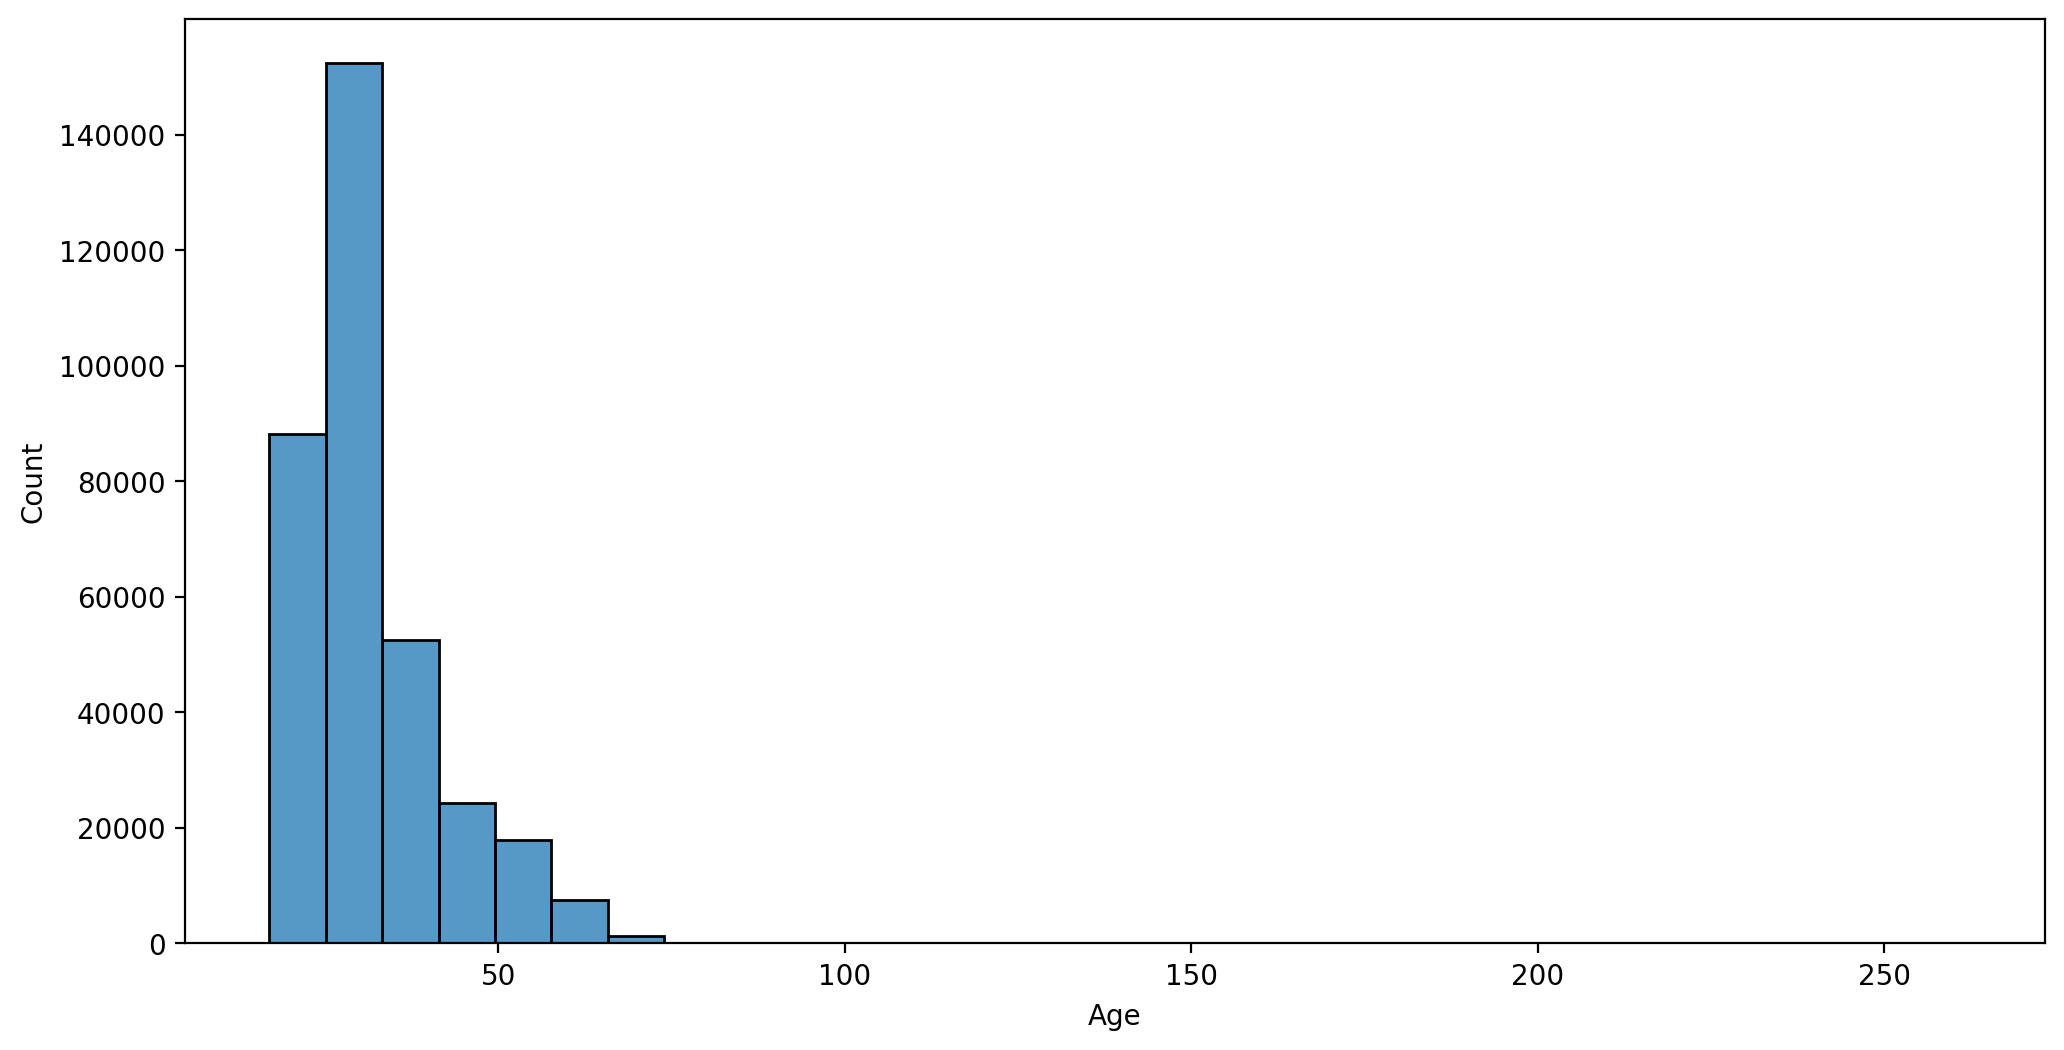

In [15]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(casual_data['age'], bins=30)

plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('../Reports/plots/c_age_dist.png')

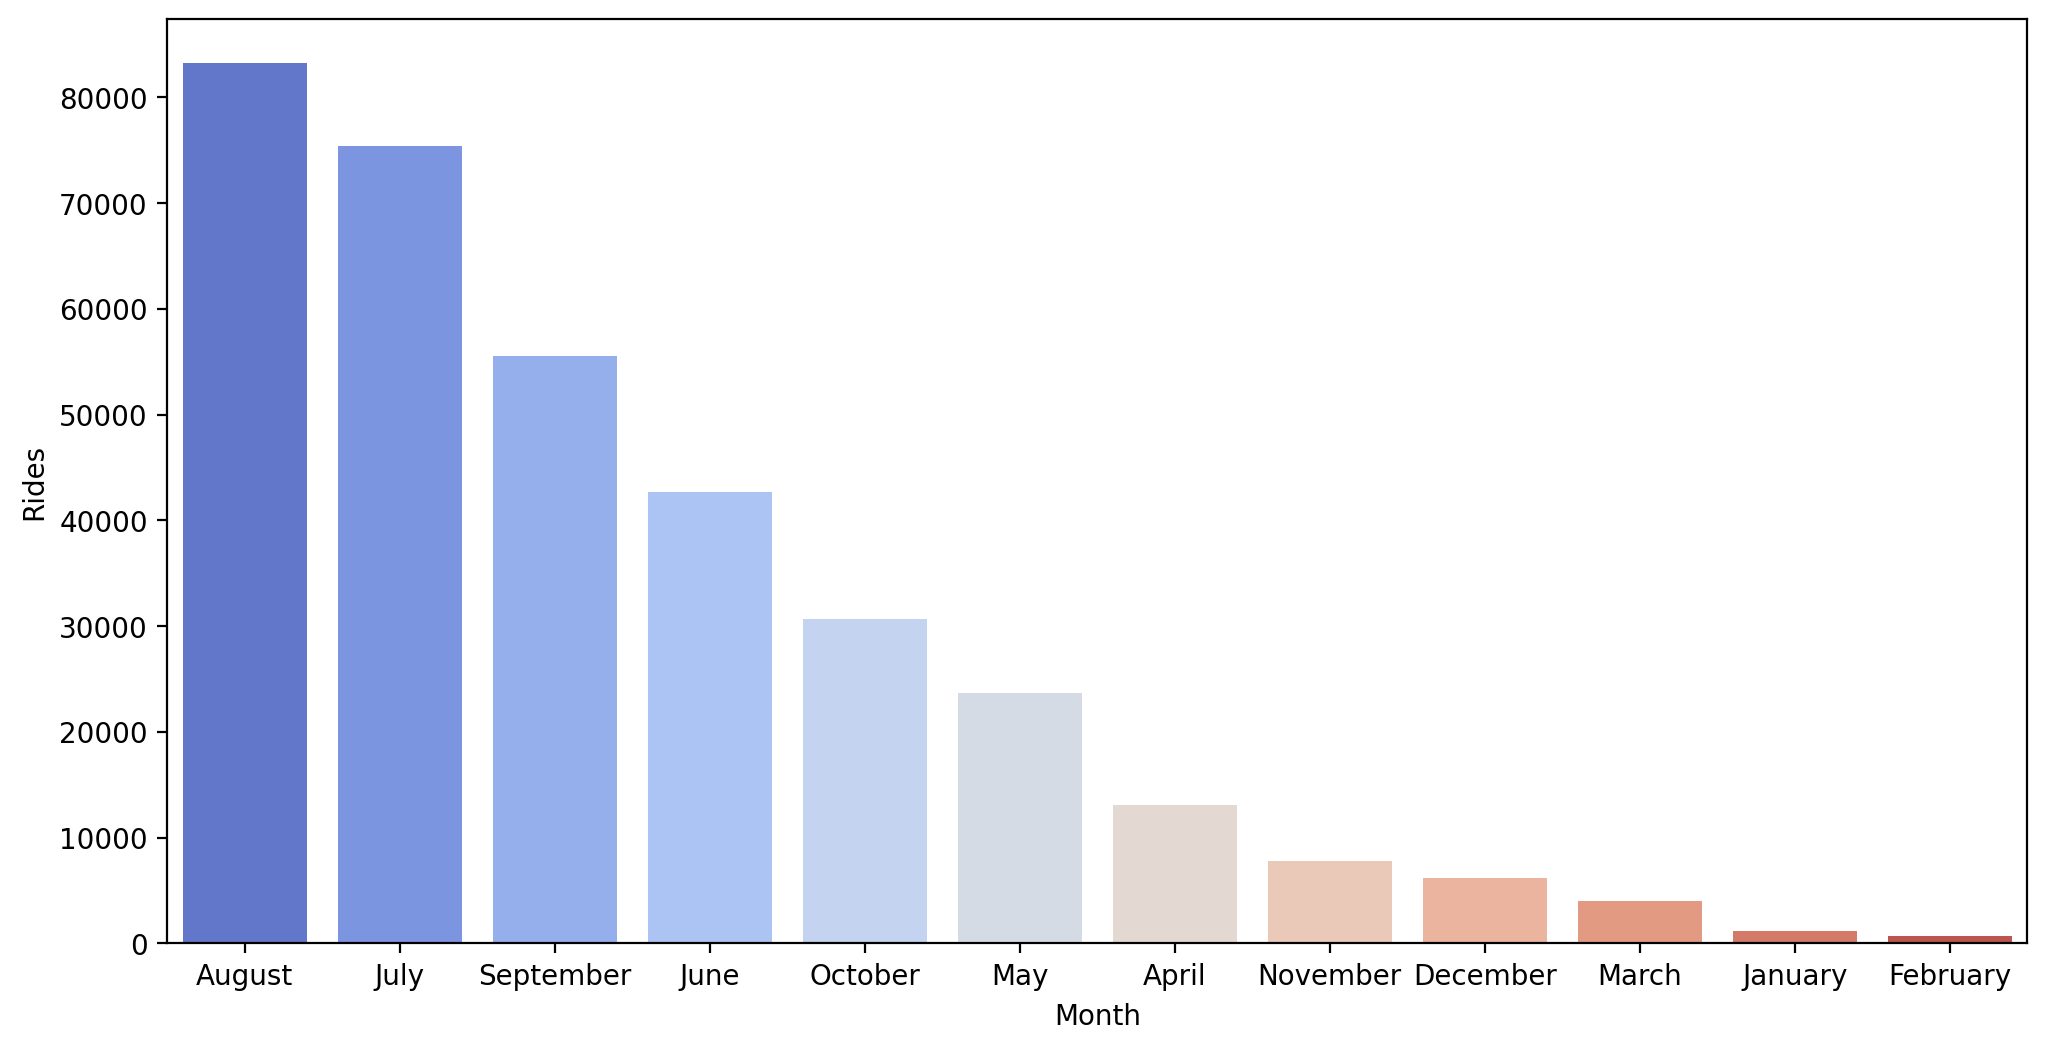

In [16]:
labels = []
order = list(casual_data['start_time'].dt.month.value_counts().index)
values = list(casual_data['start_time'].dt.month.value_counts().values)
for index in order:
    labels.append(calendar.month_name[index])


plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x=labels, y=values, palette='coolwarm')

plt.xlabel('Month')
plt.ylabel('Rides')
plt.savefig('../Reports/plots/c_monthly_rides.png')

In [17]:
print(f"The mean trip duaration for casual customers is: {round(casual_data['trip_duration'].mean()/60, 2)} minutes")

The mean trip duaration for casual customers is: 47.82 minutes
